In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings

from datetime import datetime, date,timedelta
from matplotlib import gridspec
from matplotlib import cm

from yellowbrick.regressor import PredictionError, ResidualsPlot

warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\yaotang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
sns.set(style="whitegrid")

In [3]:
df = pd.read_pickle('df_MetSFEC.pkl')

In [4]:
df.head()

,TIMESTAMP_START_x,TIMESTAMP_END_x,G,SWC_1,SWC_2,SWC_3,SWC_4,SWC_5,SWC_6,TS_1,...,h2o_spikes,u_var,v_var,w_var,ts_var,co2_var,h2o_var,w/ts_cov,w/co2_cov,w/h2o_cov
0,201201010000,201201010030,-2.595333,NaN,NaN,NaN,NaN,NaN,NaN,24.073333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201201010030,201201010100,-2.882667,NaN,NaN,NaN,NaN,NaN,NaN,24.006667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201201010100,201201010130,-3.149000,NaN,NaN,NaN,NaN,NaN,NaN,23.903333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201201010130,201201010200,-3.426333,NaN,NaN,NaN,NaN,NaN,NaN,23.863333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201201010200,201201010230,-3.579333,NaN,NaN,NaN,NaN,NaN,NaN,23.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(list(df))

['TIMESTAMP_START_x', 'TIMESTAMP_END_x', 'G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 'SW_IN', 'SW_OUT', 'LW_IN', 'LW_OUT', 'PPFD_IN', 'RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'PPFD_OUT', 'NETRAD', 'T_CANOPY', 'PA', 'P_1', 'P_2', 'BATTERY_VOLTAGE', 'T_LW_IN', 'T_LW_OUT', 'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 'WS_1', 'WD_1', 'WS_2', 'WS_3', 'WS_4', 'H2O_1', 'H2O_2', 'H2O_3', 'H2O_4', 'H2O_5', 'H2O_6', 'CO2_1', 'CO2_2', 'CO2_3', 'CO2_4', 'CO2_5', 'CO2_6', 'LW_IN_CORR', 'LW_OUT_CORR', 'PPFD_IN_2', 'Rho_PAR', 'Rho_OIR', 'NDVI', 'TIMESTAMP', 'DOY_x', 'SV_IN_1A', 'SV_OUT_1A', 'SV_MEAN_1A', 'SV_IN_1B', 'SV_OUT_1B', 'SV_MEAN_1B', 'SV_IN_2A', 'SV_OUT_2A', 'SV_MEAN_2A', 'SV_IN_2B', 'SV_OUT_2B', 'SV_MEAN_2B', 'SV_IN_3A', 'SV_OUT_3A', 'SV_MEAN_3A', 'SV_IN_3B', 'SV_OUT_3B', 'SV_MEAN_3B', 'SV_IN_4A', 'SV_OUT_4A', 'SV_MEAN_4A', 'SV_IN_5A', 'SV_OUT_5A', 'SV_MEAN_5A', 'SV_IN_5B', 'SV_OUT_5B', 'SV_MEAN_5B', 'SV_IN_6A', 'SV_OUT_6A', '

Noon

In [6]:
df_noon = df.loc[24::48]

# Time Period

Drought

In [7]:
# all drought
time_start = datetime(2015,8,1,0,0,0)
time_end = datetime(2016,3,1,0,0,0)

# very dry
# time_start = datetime(2015,9,1,0,0,0)
# time_end = datetime(2015,11,1,0,0,0)

In [8]:
df_drought = df_noon.loc[(df_noon['TIMESTAMP'] > time_start) & (df_noon['TIMESTAMP'] < time_end)]

In [9]:
# cols_drop = ['TIMESTAMP_START','TIMESTAMP_END','TIMESTAMP','BATTERY_VOLTAGE',
#              'H2O_1','H2O_2','H2O_3','H2O_4','H2O_5','H2O_6',
#              'RH_2','RH_3','RH_4','RH_5','P_2','RH_6',
#              'WS_4','Rho_PAR','Rho_OIR','NDVI',
#              'PPFD_IN','PPFD_OUT','T_LW_IN','T_LW_OUT','LW_IN','LW_OUT',
#              'PPFD_IN_2','PA']
# cols = ['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 
#        'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 
#        'SW_IN', 'SW_OUT', 'RH_1','NETRAD', 'T_CANOPY', 
#        'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 
#        'WS_1', 'WD_1', 
#        'CO2_1', 'CO2_2', 'CO2_3', 'CO2_4', 'CO2_5', 'CO2_6', 
#        'LW_IN_CORR', 'LW_OUT_CORR', 
#        'SV_OUT_1A']
# cols = ['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 
#        'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 
#        'SW_IN', 'SW_OUT', 'RH_1','NETRAD', 'T_CANOPY', 
#        'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 
#        'WS_1', 
#        'CO2_1', 'CO2_2', 'CO2_3', 'CO2_4', 'CO2_5', 'CO2_6', 
#        'SV_OUT_1A']
# cols = ['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 
#        'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5',
#         'RH_1','NETRAD', 'T_CANOPY', 
#        'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 
#        'CO2_1', 'CO2_2', 'CO2_3', 'CO2_4', 'CO2_5', 'CO2_6', 
#        'SV_OUT_1A']
cols = ['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 
       'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5',
        'RH_1','NETRAD', 'T_CANOPY', 
       'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 
       'SV_OUT_1A']
# cols = ['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 
#        'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5',
#         'RH_1','NETRAD', 'T_CANOPY', 
#        'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6',
#         'H','LE', 'sonic_temperature', 'air_temperature', 
#         'RH', 'VPD', 'Tdew','wind_speed', 'u*', 
#         'SV_OUT_1A']

Assign df for feature selection

In [10]:
# df_fs = df[cols].copy()
# df_fs = df_drought[cols].copy()
df_fs = df_noon[cols].copy()

In [11]:
df_fs.head()

,G,SWC_1,SWC_2,SWC_3,SWC_4,SWC_5,SWC_6,TS_1,TS_2,TS_3,...,RH_1,NETRAD,T_CANOPY,TA_1,TA_2,TA_3,TA_4,TA_5,TA_6,SV_OUT_1A
24,5.455000,NaN,NaN,NaN,NaN,NaN,NaN,25.963333,25.423333,24.906667,...,66.50,NaN,31.11,29.16,29.20,29.45,29.90,28.99,27.64,NaN
72,3.807667,NaN,NaN,NaN,NaN,NaN,NaN,25.893333,25.583333,25.250000,...,69.71,NaN,28.42,27.91,27.92,27.97,28.58,27.66,27.01,NaN
120,3.600667,NaN,NaN,NaN,NaN,NaN,NaN,25.673333,25.180000,24.816667,...,67.83,NaN,30.62,29.03,28.33,28.66,29.68,28.10,26.44,NaN
168,-2.042333,NaN,NaN,NaN,NaN,NaN,NaN,24.203333,24.313333,24.490000,...,90.20,NaN,24.96,23.22,23.23,23.62,23.90,23.34,23.28,NaN
216,3.847000,NaN,NaN,NaN,NaN,NaN,NaN,25.783333,25.310000,24.940000,...,67.75,NaN,31.41,28.30,27.98,28.37,29.05,28.48,27.53,NaN


In [12]:
df_fs.isna().sum()

G             363
SWC_1         964
SWC_2         955
SWC_3        1016
SWC_4        1096
SWC_5         957
SWC_6         996
TS_1          514
TS_2          514
TS_3          476
TS_4          476
TS_5          411
RH_1          500
NETRAD       1090
T_CANOPY     1161
TA_1          559
TA_2          855
TA_3          536
TA_4          606
TA_5          646
TA_6          601
SV_OUT_1A    1789
dtype: int64

In [13]:
y_list = cols[-1]
cols_x = cols[:-2]
print(y_list)
print(cols_x)

SV_OUT_1A
['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 'RH_1', 'NETRAD', 'T_CANOPY', 'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5']


In [14]:
print(list(df_fs))

['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 'RH_1', 'NETRAD', 'T_CANOPY', 'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 'SV_OUT_1A']


In [15]:
df_ml = df_fs.dropna(axis = 0,how = 'any')
df_ml.shape

(161, 22)

In [16]:
# df_ml.to_pickle('SapVelocity_ML_Drought.pkl')

In [17]:
print(list(df_ml))

['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 'RH_1', 'NETRAD', 'T_CANOPY', 'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 'SV_OUT_1A']


# Machine Learning Models

In [18]:
X_org = df_ml.drop(y_list,axis = 1)
y_org = df_ml[y_list]

In [19]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y_org)

# Feature Importance 

[0.05855665 0.05031279 0.04562082 0.0457751  0.04801029 0.04227464
 0.04508118 0.04529141 0.04884095 0.04937857 0.05254829 0.04782932
 0.05598728 0.05773133 0.04520529 0.04893829 0.04388853 0.04062443
 0.04540009 0.04132006 0.04138469]


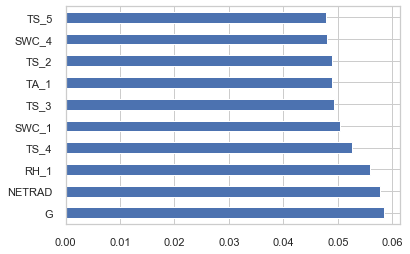

Feature ranking:
1. feature 0 (0.058557)
2. feature 13 (0.057731)
3. feature 12 (0.055987)
4. feature 10 (0.052548)
5. feature 1 (0.050313)
6. feature 9 (0.049379)
7. feature 15 (0.048938)
8. feature 8 (0.048841)
9. feature 4 (0.048010)
10. feature 11 (0.047829)
11. feature 3 (0.045775)
12. feature 2 (0.045621)
13. feature 18 (0.045400)
14. feature 7 (0.045291)
15. feature 14 (0.045205)
16. feature 6 (0.045081)
17. feature 16 (0.043889)
18. feature 5 (0.042275)
19. feature 20 (0.041385)
20. feature 19 (0.041320)
21. feature 17 (0.040624)


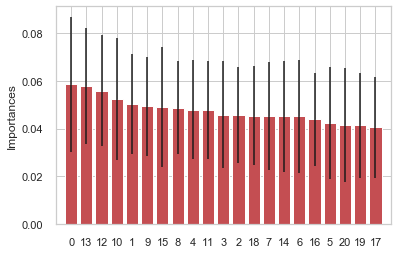

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# change the classifiers
forest = RandomForestClassifier()
# fit the model 
forest.fit(X_org,y_encoded)
print(forest.feature_importances_)
feat_importances = pd.Series(forest.feature_importances_, index=X_org.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_org.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
# plt.title("Feature importances")
plt.bar(range(X_org.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_org.shape[1]), indices)
plt.xlim([-1, X_org.shape[1]])
plt.ylabel("Importances")
plt.show()

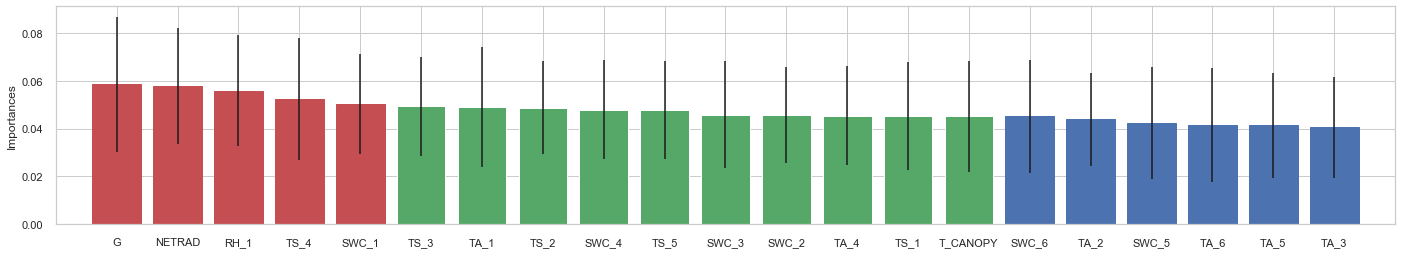

In [21]:
# Plot the feature importances of the forest
plt.figure(figsize = (24,4))
# plt.title("ET Feature importances")
barlist = plt.bar(range(X_org.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
for i in range(5):
    barlist[i].set_color('r')
for i in range(6):
    barlist[-(i+1)].set_color('b')
plt.xticks(range(X_org.shape[1]), X_org.columns[indices])
plt.xlim([-1, X_org.shape[1]])
plt.ylabel("Importances")
plt.show()

In [22]:
feat_importances

G           0.058557
SWC_1       0.050313
SWC_2       0.045621
SWC_3       0.045775
SWC_4       0.048010
SWC_5       0.042275
SWC_6       0.045081
TS_1        0.045291
TS_2        0.048841
TS_3        0.049379
TS_4        0.052548
TS_5        0.047829
RH_1        0.055987
NETRAD      0.057731
T_CANOPY    0.045205
TA_1        0.048938
TA_2        0.043889
TA_3        0.040624
TA_4        0.045400
TA_5        0.041320
TA_6        0.041385
dtype: float64

# Feature Selection

Model-based Feature Selection

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
# X.shape

# clf = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls')
# clf = clf.fit(X_org, y_org)
clf = RandomForestClassifier()
clf = clf.fit(X_org, y_encoded)

clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_org)
y_new = y_org
# X_new.shape   

cols = model.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
new_features = X_org.columns[cols]
print(list(new_features))

['G', 'SWC_1', 'SWC_3', 'SWC_4', 'SWC_6', 'TS_1', 'TS_4', 'TS_5', 'RH_1', 'NETRAD']


In [24]:
# # Feature Selection
# # Automatic Fearture Selection
# from sklearn.feature_selection import SelectPercentile
# rng = np.random.RandomState(42)
# noise_train = rng.normal(size=(len(X_train_prefs), 50))
# X_train_noise = np.hstack([X_train_prefs, noise_train])
# noise_test = rng.normal(size=(len(X_test_prefs), 50))
# X_test_noise = np.hstack([X_test_prefs, noise_test])

# select = SelectPercentile(percentile=10)
# select.fit(X_train_noise, y_train)

# # transform training set
# X_train1 = select.transform(X_train_noise)
# # transform test data
# X_test1 = select.transform(X_test_noise)

# print("X_train.shape: {}".format(X_train_noise.shape))
# print("X_train_selected.shape: {}".format(X_train1.shape))

Split train and test data

1. assign datasets for ML models

In [25]:
X = X_new
y = y_new

In [26]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y)

In [27]:
# Preprocessing & Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_pre)
# Train and Test data before feature selection
X_train_prefs = scaler.transform(X_train_pre)
X_test_prefs = scaler.transform(X_test_pre)

Train and Test Data

In [28]:
X_train = X_train_prefs
X_test = X_test_prefs

# Simple ML Regressors

k-neighbors regression

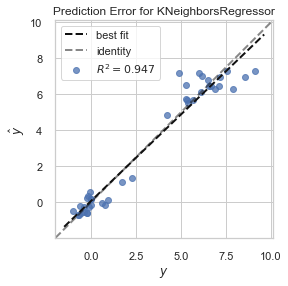

In [29]:
# k-neighbors regression
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=6)

visualizer1 = PredictionError(knr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()   

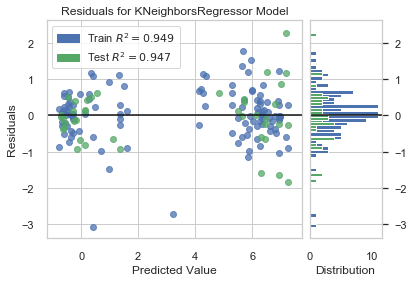

In [30]:
visualizer2 = ResidualsPlot(knr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Linear Regression

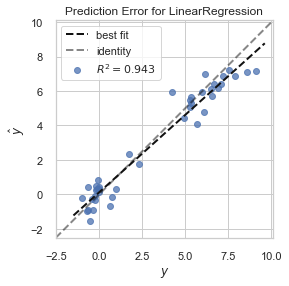

In [32]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
# feat_importances = lr.feature_importances_
# print(feat_importances)
visualizer1 = PredictionError(lr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()   

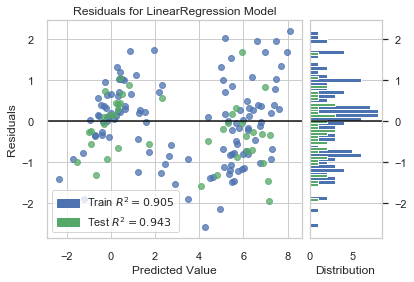

In [33]:
visualizer2 = ResidualsPlot(lr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Ridge Regression

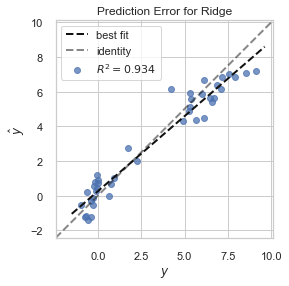

In [34]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 5)

visualizer1 = PredictionError(rr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

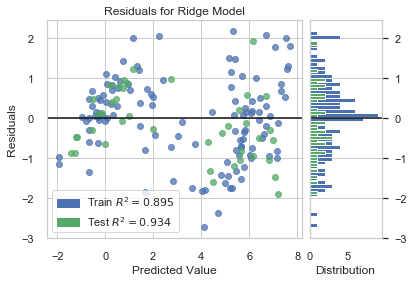

In [35]:
visualizer2 = ResidualsPlot(rr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Lasso

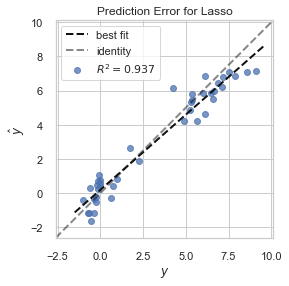

In [36]:
from sklearn.linear_model import Lasso
lsr = Lasso(alpha = 0.01, max_iter=10000)
visualizer1 = PredictionError(lsr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

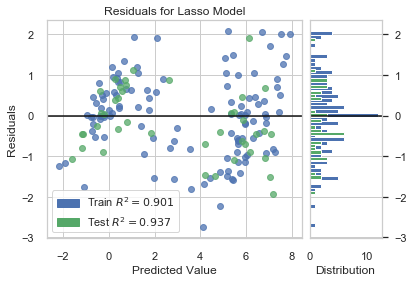

In [37]:
visualizer2 = ResidualsPlot(lsr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Decision Tree

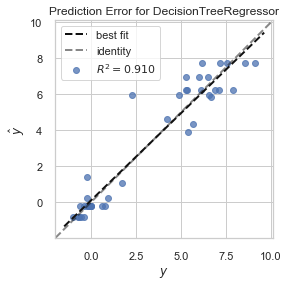

In [38]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 5)

visualizer1 = PredictionError(dtr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()

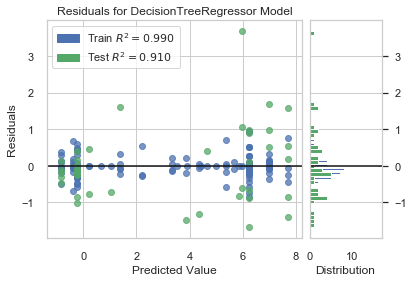

In [39]:
visualizer2 = ResidualsPlot(dtr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Random Forest

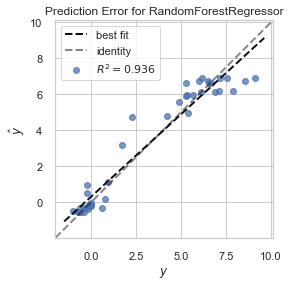

In [40]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=0,n_estimators=1000)

visualizer1 = PredictionError(rfr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

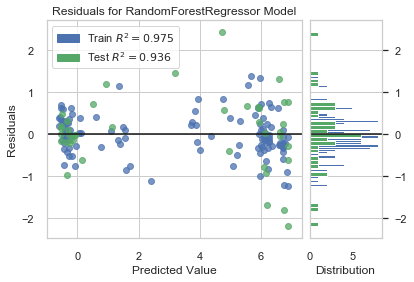

In [41]:
visualizer2 = ResidualsPlot(rfr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Support Vector Machines

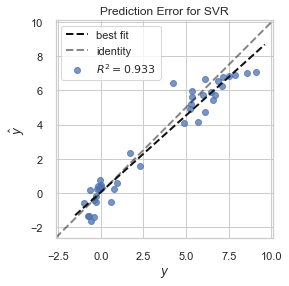

In [42]:
from sklearn.svm import SVR
# svmr = SVR(gamma = 'scale',C = 1.0, epsilon = 0.2)
svmr = SVR(kernel='linear', gamma='auto')

visualizer1 = PredictionError(svmr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

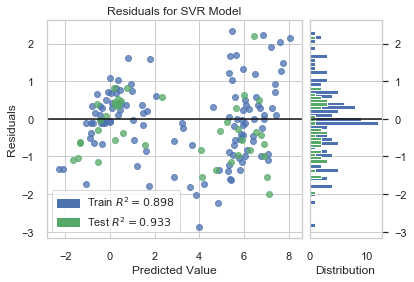

In [43]:
visualizer2 = ResidualsPlot(svmr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Stochastic gradient descent regressor

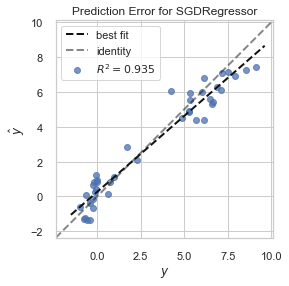

In [44]:
from sklearn import linear_model
sgdr = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

visualizer1 = PredictionError(sgdr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

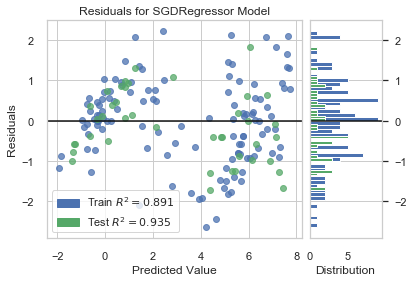

In [45]:
visualizer2 = ResidualsPlot(sgdr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Shallow Neural Networks

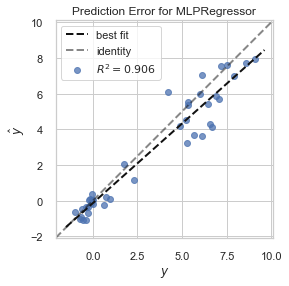

In [46]:
# Shallow Neural Networks
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor()

visualizer1 = PredictionError(mlpr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

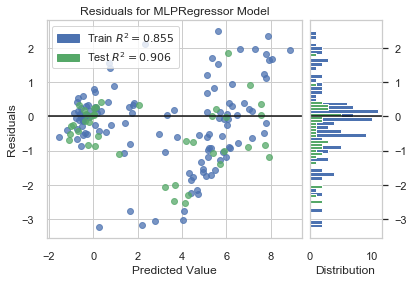

In [47]:
visualizer2 = ResidualsPlot(mlpr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()